# Charting Data 

## Pulling Data From Website

In [94]:
import numpy as np
import pandas as pd 
import requests
import json

data = {
    'filters': 'taxnodes:Technology|Information Technology|Artificial Intelligence|Cognitive Science@@semantic-units:arXiv.org',
    'fields': 'concept-tagsConf,cdid,taxnodesConf,modified,authorsRaw,title',
    'sort': 'title_sort asc',
    'limit': 2000,
    'offset': 0
}

response = requests.post('https://aitopics.org/i2kweb/webapi/search', data=data, auth=('aitopics-guest', 'HvGSauJ00COgRnGX'))

response_data = response.json()

## Strips the Unneeded Strings from Tags

In [95]:
def format_tag(tag):
    end = tag.find('::')
    return (tag[0:end])

tag_count = {}

for article in response_data:
    tags = article.get('concept-tagsConf')
    
    for tag in tags or []:
        tag = format_tag(tag)

        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

## Converts the Dictionary to a List of Dictionary 

In [96]:
to_list = []

for key, value in tag_count.items():
    temp = {}
    temp['Name'] = key
    temp['Occurances'] = value
    to_list.append(temp)

dataFrame = pd.DataFrame(to_list)
dataFrame

,Name,Occurances
0,diagnostic medicine,62
1,machine learning,1735
2,consumer health,56
3,natural language,423
4,artificial intelligence,1985
...,...,...
14515,pc-dart,2
14516,darts-2nd,1
14517,lbt,1
14518,cifar-10 and cifar-100,1


## Getting the Top `n` Largest Values and Plots Them

<AxesSubplot:xlabel='Name'>

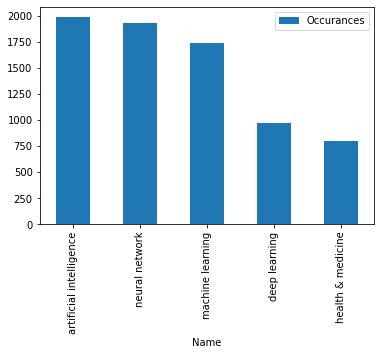

In [97]:
dataFrame.nlargest(5, ['Occurances']).plot.bar(x='Name', y='Occurances')

# Questions about Data Structures

## The Strings after the Tags
Each set of data gets returned with these numbers after the tag. It is very easy to remove them because you remove everything after `::` but is there a way to do this where we don't have to loop over the entire data set and remove things like this? 

## Not having to Manipulate the Data with Python

In [98]:
responseData = pd.DataFrame(response_data)
responseData

,concept-tagsConf,cdid,taxnodesConf,modified,authorsRaw,title
0,"[diagnostic medicine::175.778, machine learnin...",arxivorg:CBBFE8A2,"[Genre|Personal|Interview::0.477154, Genre|Per...",2021-01-12T00:00:00Z,"[Wang, Dakuo, Wang, Liuping, Zhang, Zhan, Wang, Ding, Zhu, Haiyi, Gao, Yvonn...","""Brilliant AI Doctor"" in Rural China: Tensions and Challenges in AI-Powered ..."
1,"[machine learning::262.338, reinforcement lear...",arxivorg:3E2F104A,[Industry|Health & Medicine|Therapeutic Area::...,2019-08-15T00:00:00Z,"[Hoey, Jesse, MacKinnon, Neil J.]","""Conservatives Overfit, Liberals Underfit"": The Social-Psychological Control..."
2,"[machine learning::593.251, natural language::...",arxivorg:70E22CB3,"[Country|North America::1.0, Country|North Ame...",2017-11-14T00:00:00Z,"[Israelsen, Brett W, Ahmed, Nisar R]","""Dave...I can assure you...that it's going to be all right..."" -- A definiti..."
3,"[machine learning::133.55, artificial intellig...",arxivorg:307AE56B,"[Genre|Research Report::1.0, Genre|Research Re...",2021-07-27T00:00:00Z,"[Lyons, Michael J.]","""Excavating AI"" Re-excavated: Debunking a Fallacious Account of the JAFFE Da..."
4,"[machine learning::18.4734, artificial intelli...",arxivorg:07A12138,[Technology|Information Technology|Communicati...,2019-03-15T00:00:00Z,"[Hu, Baogang, Dong, Weiming]","""Ge Shu Zhi Zhi"": Towards Deep Understanding about Worlds"
...,...,...,...,...,...,...
1995,"[machine learning::37.6269, artificial intelli...",arxivorg:73A7B4B7,[Technology|Information Technology|Artificial ...,2017-11-09T00:00:00Z,"[Kulkarni, Shruti R., Alexiades, John M., Rajendran, Bipin]",Learning and Real-time Classification of Hand-written Digits With Spiking Ne...
1996,"[machine learning::75.224, natural language::7...",arxivorg:75747166,[Technology|Information Technology|Artificial ...,2019-07-15T00:00:00Z,"[Hudson, Drew A., Manning, Christopher D.]",Learning by Abstraction: The Neural State Machine
1997,"[deep learning::202.469, neuron::202.469, neur...",arxivorg:F0DBABC8,"[Country|North America::0.66745, Country|North...",2021-11-21T00:00:00Z,"[Peng, Jian, Sun, Xian, Deng, Min, Tao, Chao, Tang, Bo, Li, Wenbo, Wu, Guohu...",Learning by Active Forgetting for Neural Networks
1998,"[machine learning::106.851, artificial intelli...",arxivorg:6BB25370,[Technology|Information Technology|Artificial ...,2020-12-23T00:00:00Z,"[Hosseini, Ramtin, Xie, Pengtao]","Learning by Self-Explanation, with Application to Neural Architecture Search"


When converting it to a *Data Frame* there is also the issue of each subcatagory having multiple values listed. I looked into nesting *Data Frames* but I saw some responses saying things along the lines of that is not optimal because it will use `python` code to go through values instead of the `C` code. I also saw something called `MultiIndex` but I did not try it out yet. 

## Things I need to try

- Removing the unneeded strings using pandas instead of python
- Try `MultiIndex` for multilayered indexing 

Plot of time on the `x` axis and count of occurances of the top 4 tags 

how many occances of tags per week 
functions for grouping by week (`groupby` & `aggrugate`) 

---

Liner regression 